### 05_model_SafeLoad
df.to_html(path)  
json_str = model.to_json()  f.write(json_str)  
model.save_weights(weight_path)  
model.save(model_path)  

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(os.path.join(".","diabetes.csv"))
print(df.head())
df.head().to_html(os.path.join(".","model_data","Ch5_2_1.html"))
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [8]:
df.loc[0,:]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [32]:
np.random.seed(10)
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv(os.path.join(".","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 定義模型
# One-hot編碼
Y = to_categorical(Y) ###
model = Sequential()
model.add(Dense(10, input_shape=(X.shape[1],), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(Y.shape[1], activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"]) 
# 訓練模型
model.fit(X, Y, epochs=15, batch_size=10, verbose=1)
# 評估模型
loss, accuracy = model.evaluate(X, Y, verbose=0)
print("準確度 = {:.2f}".format(accuracy))


Train on 768 samples
Epoch 1/15
768/768 [==============================] - 0s 538us/sample - loss: 0.7144 - accuracy: 0.5234
Epoch 2/15
768/768 [==============================] - 0s 120us/sample - loss: 0.6364 - accuracy: 0.6992
Epoch 3/15
768/768 [==============================] - 0s 107us/sample - loss: 0.6068 - accuracy: 0.7031
Epoch 4/15
768/768 [==============================] - 0s 105us/sample - loss: 0.5862 - accuracy: 0.7083
Epoch 5/15
768/768 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.72 - 0s 108us/sample - loss: 0.5696 - accuracy: 0.7344
Epoch 6/15
768/768 [==============================] - 0s 118us/sample - loss: 0.5563 - accuracy: 0.7318
Epoch 7/15
768/768 [==============================] - 0s 107us/sample - loss: 0.5443 - accuracy: 0.7474
Epoch 8/15
768/768 [==============================] - 0s 149us/sample - loss: 0.5338 - accuracy: 0.7513
Epoch 9/15
768/768 [==============================] - 0s 179us/sample - loss: 0.5246 - accuracy: 0.7526
E

訓練資料集的準確度 = 0.79
測試資料集的準確度 = 0.72


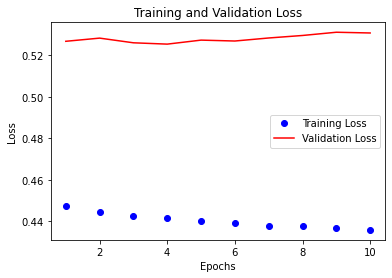

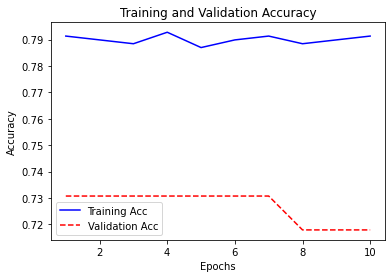

In [34]:
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [35]:
json_str = model.to_json()
with open(os.path.join(".","model_data","Ch5_5_1Model.config"), "w") as text_file:
    text_file.write(json_str)
# 儲存模型權重
model.save_weights(os.path.join(".","model_data","Ch5_5_1Model.weight"))

In [36]:
model.save(os.path.join(".","model_data","Ch5_5_1a.h5"))

In [41]:
predict_values = model.predict(X_test, batch_size=10, verbose=0)
for i in range(5):
    print(predict_values[i])

[0.94350123 0.05649875]
[0.52070904 0.47929093]
[0.9692554  0.03074463]
[0.11821854 0.8817815 ]
[0.97141063 0.02858939]
